In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [10]:
#c = tf.constant(1)
#d = tf.Variable(1)

* Linear regression.
* Loss parametric of (w)
* Compute gradients and update
* Use optimizer to minimize loss
* Use LinearRegression (estimator) to find a line
* play and see how loss is effected
* Create custom Estimator based on optimizer which can be used as a package

* Redo the whole thing for various parametric forms. [[degree n]]

# Data

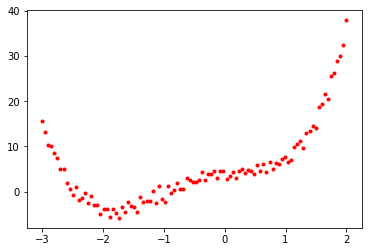

In [100]:
X = np.linspace(-3, 2, 100)
Y = X**4 + 2*X**3 - X**2 + X * 2 + 4 + np.random.normal(0, 1,X.size)
plt.plot(X, Y, 'r.')
plt.show()

# numpy

In [107]:
p = 1
_X = X.reshape(-1,1)
X_input = np.hstack([_X**n for n in range(p + 1)])

w = np.random.normal(0, 1, p + 1)

Y_pred = X_input.dot(w)

In [108]:
Y_pred.shape, X_input.shape, X.shape, w.shape

((100,), (100, 2), (100,), (2,))

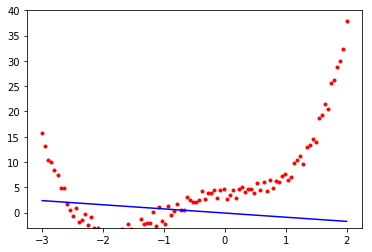

In [109]:
plt.plot(X, Y, 'r.')
plt.plot(X, Y_pred, 'b')
plt.ylim(-3, 40)
plt.show()

### hstack

In [105]:
t=np.array([1,2,3,4]).reshape(-1,1)

In [90]:
np.hstack([t,t,t])
# hstack binds .. but the data should have been reshaped. It treats (x,) ~ vectors as (1,x) while joining them

array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3],
       [4, 4, 4]])

# TF -- scalars

In [167]:
# Define a single operation
# Operation is on a placeholder
x = tf.placeholder(dtype=tf.float32)
y_pred = tf.placeholder(dtype=tf.float32)

# variables
b = tf.Variable([1], dtype=tf.float32)
w = tf.Variable([-1], dtype=tf.float32)

# y

y = b + x * w
print y.shape

# loss
error = y_pred - y
loss = tf.reduce_sum(error ** 2)

<unknown>


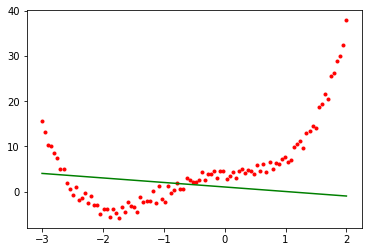

In [168]:
res = None
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    res = sess.run(y, {x: X})

res.shape
plt.plot(X, Y, 'r.')
plt.plot(X, res, 'g')
plt.show()

### Optimizer

In [254]:
learning_rate = 1e-5
gdo = tf.train.GradientDescentOptimizer(learning_rate)
optimizer = gdo.minimize(loss)

[ 3.46838522] [ 5.80905914]
(100,) 44.9222119141


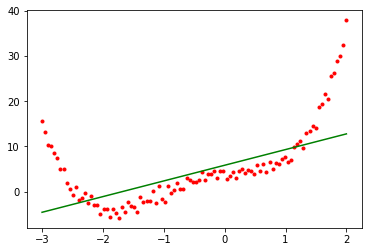

In [255]:
n_steps = 1000
with tf.Session() as sess:
    sess.run(init)
    for i in range(n_steps):
        (_, w_val, b_val) = sess.run((optimizer, w, b), {x: X, y_pred: Y})
    print w_val, b_val
    (res, loss_res) = sess.run((y, loss), {x: X, y_pred: Y})

print res.shape, loss_res / X.shape[0]
plt.plot(X, Y, 'r.')
plt.plot(X, res, 'g')
plt.show()

## TF -- Scalar using LinearRegression

In [266]:
feature_columns = [tf.feature_column.numeric_column("X")]
lr = tf.estimator.LinearRegressor(feature_columns=feature_columns)
input_fn = tf.estimator.inputs.numpy_input_fn({"X": X}, Y, batch_size=10, num_epochs=100, shuffle=True)
lr.train(input_fn=input_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1822740990>, '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_num_ps_replicas': 0, '_tf_random_seed': None, '_master': '', '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_model_dir': '/var/folders/_n/7gq_v92s6xq549134xk8hyts_mxyxb/T/tmpmmFYj9', '_save_summary_steps': 100}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/_n/7gq_v92s6xq549134xk8hyts_mxyxb/T/tmpmmFYj9/model.ckpt.
INFO:tensorflow:loss = 1903.08, step = 1
INFO:tensorflow:global_step/sec: 1115.95
INFO:tensorflow:loss = 425.299, step = 101 (0.092 sec)
INFO:tensorflow:global_step/sec: 1413.39
INFO:tensorflow:loss = 1106.4, step = 201 

INFO:tensorflow:Starting evaluation at 2018-01-19-10:30:31
INFO:tensorflow:Restoring parameters from /var/folders/_n/7gq_v92s6xq549134xk8hyts_mxyxb/T/tmpmmFYj9/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-01-19-10:30:31
INFO:tensorflow:Saving dict for global step 1000: average_loss = 43.6891, global_step = 1000, loss = 4368.91
INFO:tensorflow:Restoring parameters from /var/folders/_n/7gq_v92s6xq549134xk8hyts_mxyxb/T/tmpmmFYj9/model.ckpt-1000
(100, 1) 43.6891


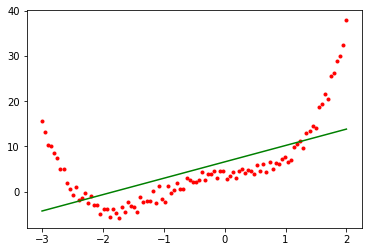

In [267]:
predict_input_fn = tf.estimator.inputs.numpy_input_fn({"X": X}, Y, shuffle=False)
loss_res = (lr.evaluate(input_fn=predict_input_fn))["average_loss"] 
res = np.array([i["predictions"] for i in lr.predict(input_fn=predict_input_fn)])
print res.shape, loss_res
plt.plot(X, Y, 'r.')
plt.plot(X, res, 'g')
plt.show()

In [268]:
[(i, lr.get_variable_value(i)) for i in lr.get_variable_names()]


[('global_step', 1000),
 ('linear/linear_model/X/weights', array([[ 3.62284636]], dtype=float32)),
 ('linear/linear_model/X/weights/part_0/Ftrl',
  array([[ 10268971.]], dtype=float32)),
 ('linear/linear_model/X/weights/part_0/Ftrl_1',
  array([[-58047.48046875]], dtype=float32)),
 ('linear/linear_model/bias_weights', array([ 6.55571985], dtype=float32)),
 ('linear/linear_model/bias_weights/part_0/Ftrl',
  array([ 3119674.5], dtype=float32)),
 ('linear/linear_model/bias_weights/part_0/Ftrl_1',
  array([-57895.52734375], dtype=float32))]

In [311]:
def model_funx(features, labels, mode, params=None):
    
    w = tf.get_variable('w', [1], dtype=tf.float64)
    b = tf.get_variable('b', [1], dtype=tf.float64)
    x = features['X']
    y = w * x + b
    
    predictions = y
    
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(
        mode=mode,
        predictions=predictions,
        loss=None,
        train_op=None
    )
    
    loss = tf.reduce_sum(tf.square(y-labels)) / tf.cast(tf.shape(y), dtype=tf.float64)
    global_step = tf.train.get_global_step()

    optimizer = tf.train.GradientDescentOptimizer(params.get("learning_rate",0.2))
    train_op = tf.group(optimizer.minimize(loss), tf.assign_add(global_step, 1))
    
    return tf.estimator.EstimatorSpec(
        mode=mode,
        predictions=predictions,
        loss=loss,
        train_op=train_op
    )

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x182279ca90>, '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_num_ps_replicas': 0, '_tf_random_seed': None, '_master': '', '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_model_dir': '/var/folders/_n/7gq_v92s6xq549134xk8hyts_mxyxb/T/tmpWRAuWD', '_save_summary_steps': 100}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/_n/7gq_v92s6xq549134xk8hyts_mxyxb/T/tmpWRAuWD/model.ckpt.
INFO:tensorflow:loss = 126.238582186, step = 1
INFO:tensorflow:global_step/sec: 1180.01
INFO:tensorflow:loss = 68.5808565517, step = 101 (0.087 sec)
INFO:tensorflow:global_step/sec: 1341.33
INFO:tensorflow:loss = 31.5913

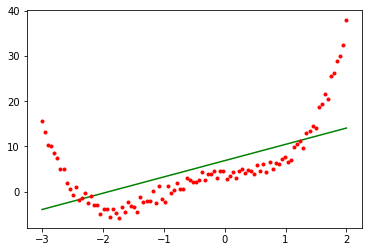

In [312]:
estimator = tf.estimator.Estimator(model_fn=model_funx, params = {"learning_rate": 0.02})
estimator.train(input_fn=input_fn)
res = np.array([i for i in estimator.predict(input_fn=predict_input_fn)])
loss_res = estimator.evaluate(input_fn=predict_input_fn)
print res.shape, loss_res
plt.plot(X, res, "g")
plt.plot(X, Y, "r.")
plt.show()